In [67]:
!pip install geopandas > /dev/null
!pip install mapclassify > /dev/null

In [68]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob as glb

In [69]:
%cd /content/drive/MyDrive/Ciclos_unalm/2023 -I/Meteo fis/dataset

/content/drive/MyDrive/Ciclos_unalm/2023 -I/Meteo fis/dataset


In [70]:
%ls

CC_monthly.nc                  PP_sin_oceano.nc
Convective_energy_Junin.nc     VHRMC.nc
lis_vhrmc_1998_2013_v01.nc.gz  wglc_clim_modified.nc


In [71]:
import xarray as xr

## Cape y wglc

In [72]:
cape=xr.open_dataset("Convective_energy_Junin.nc")
cape

<xarray.Dataset>
Dimensions:    (longitude: 13, latitude: 8, time: 26304)
Coordinates:
  * longitude  (longitude) float32 -76.5 -76.25 -76.0 ... -74.0 -73.75 -73.5
  * latitude   (latitude) float32 -10.75 -11.0 -11.25 ... -12.0 -12.25 -12.5
  * time       (time) datetime64[ns] 2015-01-01 ... 2017-12-31T23:00:00
Data variables:
    cape       (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-05-22 04:34:47 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [73]:
wglc = xr.open_dataset("wglc_clim_modified.nc")

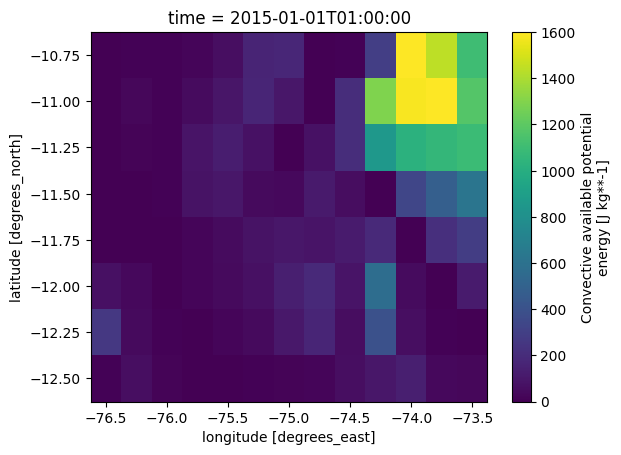

In [74]:
cape.cape.isel(time=1).plot()

In [75]:
cape_monthly=cape.resample(time="1M").mean(dim="time")
cape_monthly

<xarray.Dataset>
Dimensions:    (longitude: 13, latitude: 8, time: 36)
Coordinates:
  * longitude  (longitude) float32 -76.5 -76.25 -76.0 ... -74.0 -73.75 -73.5
  * latitude   (latitude) float32 -10.75 -11.0 -11.25 ... -12.0 -12.25 -12.5
  * time       (time) datetime64[ns] 2015-01-31 2015-02-28 ... 2017-12-31
Data variables:
    cape       (time, latitude, longitude) float32 122.6 127.6 ... 148.1 358.2
Attributes:
    Conventions:  CF-1.6
    history:      2023-05-22 04:34:47 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [76]:
cape_group_m=cape.cape.groupby(cape.time.dt.month)
cape_group_m

DataArrayGroupBy, grouped over 'month'
12 groups with labels 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12.

In [77]:
#FORMA 1PARA SACAR EL PROMEDIO
def full_mean(x):
  return x.mean(dim="time") #se hace un promedio o hace un agrupamiento 
#se tiene el promedio de para los doce meses
cape_group_m.apply(full_mean)

<xarray.DataArray 'cape' (month: 12, latitude: 8, longitude: 13)>
array([[[ 113.69374 ,  106.69573 ,  154.35338 , ...,  568.13025 ,
          715.2231  ,  782.0702  ],
        [ 142.2447  ,  105.69358 ,  146.0278  , ...,  503.5032  ,
          655.3868  ,  721.14154 ],
        [ 164.05656 ,  123.25444 ,  141.76277 , ...,  454.17038 ,
          495.87607 ,  575.60803 ],
        ...,
        [ 188.66026 ,  154.36981 ,  178.88808 , ...,  226.56764 ,
          209.52109 ,  312.68768 ],
        [  60.69578 ,  269.5012  ,  194.08893 , ...,  138.51886 ,
          131.81548 ,  294.34625 ],
        [  18.226547,  102.944855,  192.36197 , ...,  149.02882 ,
          201.81934 ,  335.10727 ]],

       [[ 106.6951  ,  103.841606,  162.98157 , ...,  504.75372 ,
          641.7404  ,  692.2124  ],
        [ 141.02202 ,  103.52451 ,  168.7731  , ...,  467.9683  ,
          609.4535  ,  643.82697 ],
        [ 169.36089 ,  113.34323 ,  153.42766 , ...,  404.4855  ,
          457.8787  ,  509.02908 ],
...
        [ 106.60138 ,  175.74759 ,  189.74568 , ...,  380.10336 ,
          318.6442  ,  501.83704 ],
        [  45.60976 ,  184.79857 ,  161.17094 , ...,  266.91846 ,
          252.3657  ,  433.03516 ],
        [  17.176762,   35.507656,  124.12603 , ...,  295.5186  ,
          273.48114 ,  459.33636 ]],

       [[ 129.6922  ,  145.23363 ,  220.34834 , ...,  647.1137  ,
          717.7099  ,  705.8717  ],
        [ 167.95247 ,  140.10544 ,  195.73201 , ...,  629.8005  ,
          755.8907  ,  732.069   ],
        [ 209.08855 ,  148.42488 ,  181.4279  , ...,  543.5931  ,
          591.1303  ,  626.1353  ],
        ...,
        [ 171.4613  ,  191.36995 ,  215.17474 , ...,  195.74974 ,
          182.33447 ,  364.77814 ],
        [  27.239182,  243.14421 ,  194.24667 , ...,  137.10173 ,
          107.52631 ,  281.03854 ],
        [   6.494215,   58.00482 ,  171.5958  , ...,  150.30986 ,
          150.36275 ,  351.2385  ]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -76.5 -76.25 -76.0 ... -74.0 -73.75 -73.5
  * latitude   (latitude) float32 -10.75 -11.0 -11.25 ... -12.0 -12.25 -12.5
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [78]:
#se aplica la función de reduce y se aplica el promedio
#el reduce y apply son casi iguales
#FORMA 2 
#para realizar el promedio
cape_montly=cape_group_m.reduce(np.mean, dim="time")
#NOTA: previamente se debe definir el objeto  PISCOt_d

In [79]:
cape_montly

<xarray.DataArray 'cape' (month: 12, latitude: 8, longitude: 13)>
array([[[ 113.69374 ,  106.69573 ,  154.35338 , ...,  568.13025 ,
          715.2231  ,  782.0702  ],
        [ 142.2447  ,  105.69358 ,  146.0278  , ...,  503.5032  ,
          655.3868  ,  721.14154 ],
        [ 164.05656 ,  123.25444 ,  141.76277 , ...,  454.17038 ,
          495.87607 ,  575.60803 ],
        ...,
        [ 188.66026 ,  154.36981 ,  178.88808 , ...,  226.56764 ,
          209.52109 ,  312.68768 ],
        [  60.69578 ,  269.5012  ,  194.08893 , ...,  138.51886 ,
          131.81548 ,  294.34625 ],
        [  18.226547,  102.944855,  192.36197 , ...,  149.02882 ,
          201.81934 ,  335.10727 ]],

       [[ 106.6951  ,  103.841606,  162.98157 , ...,  504.75372 ,
          641.7404  ,  692.2124  ],
        [ 141.02202 ,  103.52451 ,  168.7731  , ...,  467.9683  ,
          609.4535  ,  643.82697 ],
        [ 169.36089 ,  113.34323 ,  153.42766 , ...,  404.4855  ,
          457.8787  ,  509.02908 ],
...
        [ 106.60138 ,  175.74759 ,  189.74568 , ...,  380.10336 ,
          318.6442  ,  501.83704 ],
        [  45.60976 ,  184.79857 ,  161.17094 , ...,  266.91846 ,
          252.3657  ,  433.03516 ],
        [  17.176762,   35.507656,  124.12603 , ...,  295.5186  ,
          273.48114 ,  459.33636 ]],

       [[ 129.6922  ,  145.23363 ,  220.34834 , ...,  647.1137  ,
          717.7099  ,  705.8717  ],
        [ 167.95247 ,  140.10544 ,  195.73201 , ...,  629.8005  ,
          755.8907  ,  732.069   ],
        [ 209.08855 ,  148.42488 ,  181.4279  , ...,  543.5931  ,
          591.1303  ,  626.1353  ],
        ...,
        [ 171.4613  ,  191.36995 ,  215.17474 , ...,  195.74974 ,
          182.33447 ,  364.77814 ],
        [  27.239182,  243.14421 ,  194.24667 , ...,  137.10173 ,
          107.52631 ,  281.03854 ],
        [   6.494215,   58.00482 ,  171.5958  , ...,  150.30986 ,
          150.36275 ,  351.2385  ]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -76.5 -76.25 -76.0 ... -74.0 -73.75 -73.5
  * latitude   (latitude) float32 -10.75 -11.0 -11.25 ... -12.0 -12.25 -12.5
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    units:      J kg**-1
    long_name:  Convective available potential energy

In [80]:
import geopandas as gpd
shp = gpd.read_file("/content/drive/MyDrive/Ciclos_unalm/2023 -I/Meteo fis/datasets_shapes/DEPARTAMENTOS_inei_geogpsperu_suyopomalia.shp")
shp

,OBJECTID,CCDD,NOMBDEP,FUENTE,FUENTE_1,POB_PROYEC,POBTOTAL,POB_EDAD_T,POB_EDAD_1,POB_EDAD_E,...,IND_121951,IND_122042,IND_122047,IND_516462,IND_516484,Shape_Le_1,Shape_Ar_1,Shape_Le_2,Shape_Ar_2,geometry
0,1.0,01,AMAZONAS,INEI - CPV RESULTADOS,NaN,426806.0,417365.0,289648.0,69.4,239212.0,...,2139.0,3.184694e+05,3.745422e+05,5.094318e+06,34164.0,0.022988,0.000013,12.894071,3.203362,"POLYGON ((-77.81211 -2.98962, -77.81332 -2.990..."
1,2.0,02,ANCASH,INEI - CPV RESULTADOS,NaN,1180638.0,1139115.0,850842.0,74.7,701614.0,...,9366.0,2.252303e+06,1.363318e+06,3.443175e+07,74385.0,0.000000,0.000000,11.640227,2.954639,"POLYGON ((-77.64692 -8.05086, -77.64669 -8.052..."
2,3.0,03,APURIMAC,INEI - CPV RESULTADOS,NaN,430736.0,424259.0,310196.0,73.1,252356.0,...,3723.0,7.025553e+05,6.626253e+05,8.673503e+06,48594.0,0.000000,0.000000,7.730082,1.765933,"POLYGON ((-73.74632 -13.17456, -73.74570 -13.1..."
3,4.0,04,AREQUIPA,INEI - CPV RESULTADOS,NaN,1497438.0,1460433.0,1135965.0,77.8,970511.0,...,10670.0,2.094167e+06,1.296536e+06,6.487297e+07,48033.0,0.000000,0.000000,17.391102,5.330046,"POLYGON ((-71.98109 -14.64062, -71.98093 -14.6..."
4,5.0,05,AYACUCHO,INEI - CPV RESULTADOS,NaN,668213.0,650940.0,478429.0,73.5,390780.0,...,4699.0,9.729801e+05,9.490687e+05,1.461096e+07,58941.0,0.000000,0.000000,17.132543,3.643617,"POLYGON ((-74.34843 -12.17503, -74.35000 -12.1..."
5,6.0,06,CAJAMARCA,INEI - CPV RESULTADOS,NaN,1453711.0,1427527.0,1032364.0,72.3,849911.0,...,11174.0,1.338667e+06,1.314113e+06,2.803043e+07,151713.0,0.000000,0.000000,12.371207,2.684140,"POLYGON ((-78.70034 -4.62769, -78.69817 -4.629..."
6,7.0,07,CALLAO,INEI - CPV RESULTADOS,NaN,1129854.0,1046953.0,806753.0,77.1,691439.0,...,7663.0,6.713560e+05,6.398338e+05,1.386361e+08,62281.0,0.000000,0.000000,1.076171,0.011647,"POLYGON ((-77.13521 -11.81782, -77.13516 -11.8..."
7,8.0,08,CUSCO,INEI - CPV RESULTADOS,NaN,1357075.0,1315220.0,983239.0,74.8,819761.0,...,30226.0,2.693040e+06,2.441430e+06,5.132900e+07,81500.0,0.000000,0.000000,21.793780,6.000329,"POLYGON ((-72.97280 -11.25189, -72.97134 -11.2..."
8,9.0,09,HUANCAVELICA,INEI - CPV RESULTADOS,NaN,365317.0,367252.0,264458.0,72.0,209924.0,...,3856.0,6.253714e+05,5.610740e+05,7.588724e+06,48011.0,0.000000,0.000000,9.565804,1.839898,"POLYGON ((-74.57118 -11.98710, -74.57095 -11.9..."
9,10.0,10,HUANUCO,INEI - CPV RESULTADOS,NaN,760267.0,759962.0,545990.0,71.8,452246.0,...,5066.0,7.108870e+05,6.849538e+05,1.624812e+07,87912.0,0.000000,0.000000,14.596742,3.089577,"POLYGON ((-76.00486 -8.30517, -76.00301 -8.305..."


In [81]:
shp_junin=shp.iloc[[11]]
shp_junin

,OBJECTID,CCDD,NOMBDEP,FUENTE,FUENTE_1,POB_PROYEC,POBTOTAL,POB_EDAD_T,POB_EDAD_1,POB_EDAD_E,...,IND_121951,IND_122042,IND_122047,IND_516462,IND_516484,Shape_Le_1,Shape_Ar_1,Shape_Le_2,Shape_Ar_2,geometry
11,12.0,12,JUNIN,INEI - CPV RESULTADOS,NaN,1361467.0,1316894.0,970597.0,73.7,810252.0,...,7422.0,1.084204e+06,899680.2769,36698695.77,76709.0,0.0,0.0,14.319309,3.658933,"POLYGON ((-75.03564 -10.68232, -75.03436 -10.6..."


In [82]:
#Defining fuction to CROP


def xr_crop(shp_i, netcdf_i):
  
  # get box
  #crop hjace un corte en el cuadrante como un where
  box_i = shp_i.total_bounds# te da el cuadrante del del shapefile 
  
  # crop based on box
  #para utilizar el where
  #se esta definiendo los boxsiuads
  crop_netcdf_i = netcdf_i.where((netcdf_i["longitude"] > box_i[0]) & # min lon
                                 (netcdf_i["longitude"] < box_i[2]) & # max lon
                                 (netcdf_i["latitude"] > box_i[1]) & # min lat
                                 (netcdf_i["latitude"] < box_i[3]), # max lat
                                 drop = True) #es para que se saque todo el area que no nos interesa
  
  return crop_netcdf_i

def xr_shp_to_grid(shp_i, netcdf_array):

  #conversion de shpafile a un  dato grillado 
  
  # get real box
  shp_i_geometry = shp_i.geometry

  # adding crs #creating xarray dataset
  mask = netcdf_array.rio.set_crs(shp_i.crs)

  # "rasterizing"
  #se denomina como rasterización, se hace un clip para un shp determinado
  mask = mask.rio.clip(shp_i_geometry, drop = True)

  #coinciden los puntos de grilla con los datos del punto de grilla
  mask.values[~np.isnan(mask.values)] = 1 

  
  return mask.drop(["time"]) #se quita el time y el spatial_ref
#xrcrop :: como el where te hace un corte de un cuadrado
#xr_mask :: corte en base del poligono

#netcdf_i ->dato grillado
#shp_i -> shapefile
#grid mask -> mask
def xr_mask(grid_mask, netcdf_i):
  # masking
  #se hace un crop en base al mask gr
  mask_netcdf_i = netcdf_i.where(grid_mask == True)

  return mask_netcdf_i

In [83]:
!pip install rioxarray

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [84]:
import rioxarray as rio
import numpy as np
#set crs --- set cordenadas geograficas
wglc.rio.set_crs(shp_junin.crs)
wglcCRP=xr_crop(shp_i=shp_junin,netcdf_i=wglc)
#shape to grid
wglc_grid=xr_shp_to_grid(shp_i = shp_junin, netcdf_array = wglc.density.isel(time=0))
#make a mask
wglcMASK=xr_mask(grid_mask=wglc_grid, netcdf_i=wglcCRP)

In [85]:
wglcMASK

<xarray.Dataset>
Dimensions:      (time: 12, latitude: 24, longitude: 38)
Coordinates:
  * longitude    (longitude) float64 -76.46 -76.38 -76.29 ... -73.46 -73.38
  * latitude     (latitude) float64 -12.62 -12.54 -12.46 ... -10.79 -10.71
  * time         (time) int64 1 2 3 4 5 6 7 8 9 10 11 12
    spatial_ref  int64 0
Data variables:
    density      (time, latitude, longitude) float32 nan nan nan ... nan nan nan
Attributes:
    Conventions:  CF-1.8
    title:        WWLLN Global Lightning Climatology, climatological mean (20...
    contact:      jed.kaplan@arve-research.com
    source_data:  WWLLN AE georeferenced stroke counts, corrected for detecti...
    node_offset:  1
    DOI:          https://doi.org/10.5281/zenodo.6007052

In [86]:
wglc.density.isel(time=0)

<xarray.DataArray 'density' (latitude: 252, longitude: 180)>
[45360 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float64 -81.96 -81.88 -81.79 ... -67.21 -67.12 -67.04
  * latitude   (latitude) float64 -18.96 -18.88 -18.79 ... 1.792 1.875 1.958
    time       int64 1
Attributes:
    long_name:  frequency of lightning strokes per unit area
    units:      strokes km-2 d-1

In [87]:
cape_montly=cape_montly.rename({"month":"time"})
cape_montly

<xarray.DataArray 'cape' (time: 12, latitude: 8, longitude: 13)>
array([[[ 113.69374 ,  106.69573 ,  154.35338 , ...,  568.13025 ,
          715.2231  ,  782.0702  ],
        [ 142.2447  ,  105.69358 ,  146.0278  , ...,  503.5032  ,
          655.3868  ,  721.14154 ],
        [ 164.05656 ,  123.25444 ,  141.76277 , ...,  454.17038 ,
          495.87607 ,  575.60803 ],
        ...,
        [ 188.66026 ,  154.36981 ,  178.88808 , ...,  226.56764 ,
          209.52109 ,  312.68768 ],
        [  60.69578 ,  269.5012  ,  194.08893 , ...,  138.51886 ,
          131.81548 ,  294.34625 ],
        [  18.226547,  102.944855,  192.36197 , ...,  149.02882 ,
          201.81934 ,  335.10727 ]],

       [[ 106.6951  ,  103.841606,  162.98157 , ...,  504.75372 ,
          641.7404  ,  692.2124  ],
        [ 141.02202 ,  103.52451 ,  168.7731  , ...,  467.9683  ,
          609.4535  ,  643.82697 ],
        [ 169.36089 ,  113.34323 ,  153.42766 , ...,  404.4855  ,
          457.8787  ,  509.02908 ],
...
        [ 106.60138 ,  175.74759 ,  189.74568 , ...,  380.10336 ,
          318.6442  ,  501.83704 ],
        [  45.60976 ,  184.79857 ,  161.17094 , ...,  266.91846 ,
          252.3657  ,  433.03516 ],
        [  17.176762,   35.507656,  124.12603 , ...,  295.5186  ,
          273.48114 ,  459.33636 ]],

       [[ 129.6922  ,  145.23363 ,  220.34834 , ...,  647.1137  ,
          717.7099  ,  705.8717  ],
        [ 167.95247 ,  140.10544 ,  195.73201 , ...,  629.8005  ,
          755.8907  ,  732.069   ],
        [ 209.08855 ,  148.42488 ,  181.4279  , ...,  543.5931  ,
          591.1303  ,  626.1353  ],
        ...,
        [ 171.4613  ,  191.36995 ,  215.17474 , ...,  195.74974 ,
          182.33447 ,  364.77814 ],
        [  27.239182,  243.14421 ,  194.24667 , ...,  137.10173 ,
          107.52631 ,  281.03854 ],
        [   6.494215,   58.00482 ,  171.5958  , ...,  150.30986 ,
          150.36275 ,  351.2385  ]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -76.5 -76.25 -76.0 ... -74.0 -73.75 -73.5
  * latitude   (latitude) float32 -10.75 -11.0 -11.25 ... -12.0 -12.25 -12.5
  * time       (time) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    units:      J kg**-1
    long_name:  Convective available potential energy

In [88]:
import rioxarray as rio
import numpy as np
#set crs --- set cordenadas geograficas
cape_montly.rio.set_crs(shp_junin.crs)
cape_montlyCRP=xr_crop(shp_i=shp_junin,netcdf_i=cape_montly)
#shape to grid
cape_montly_grid=xr_shp_to_grid(shp_i = shp_junin, netcdf_array = cape_montly.isel(time=1))
#make a mask
cape_montlyMASK=xr_mask(grid_mask=cape_montly_grid, netcdf_i=cape_montlyCRP)

In [89]:
cape_montlyMASK

<xarray.DataArray 'cape' (time: 12, latitude: 8, longitude: 12)>
array([[[       nan,        nan,        nan, ...,        nan,
         715.2231  ,        nan],
        [105.69358 , 146.0278  , 194.93437 , ...,        nan,
         655.3868  ,        nan],
        [123.25444 , 141.76277 , 143.91989 , ..., 454.17038 ,
         495.87607 , 575.60803 ],
        ...,
        [       nan,        nan, 137.4176  , ..., 226.56764 ,
         209.52109 , 312.68768 ],
        [       nan,        nan,        nan, ..., 138.51886 ,
         131.81548 , 294.34625 ],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
         641.7404  ,        nan],
        [103.52451 , 168.7731  , 172.09717 , ...,        nan,
         609.4535  ,        nan],
        [113.34323 , 153.42766 , 140.724   , ..., 404.4855  ,
         457.8787  , 509.02908 ],
...
        [       nan,        nan, 132.2344  , ..., 380.10336 ,
         318.6442  , 501.83704 ],
        [       nan,        nan,        nan, ..., 266.91846 ,
         252.3657  , 433.03516 ],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
         717.7099  ,        nan],
        [140.10544 , 195.73201 , 223.82542 , ...,        nan,
         755.8907  ,        nan],
        [148.42488 , 181.4279  , 176.69312 , ..., 543.5931  ,
         591.1303  , 626.1353  ],
        ...,
        [       nan,        nan, 145.7385  , ..., 195.74974 ,
         182.33447 , 364.77814 ],
        [       nan,        nan,        nan, ..., 137.10173 ,
         107.52631 , 281.03854 ],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]], dtype=float32)
Coordinates:
  * longitude    (longitude) float32 -76.25 -76.0 -75.75 ... -74.0 -73.75 -73.5
  * latitude     (latitude) float32 -10.75 -11.0 -11.25 ... -12.0 -12.25 -12.5
  * time         (time) int64 1 2 3 4 5 6 7 8 9 10 11 12
    spatial_ref  int64 0
Attributes:
    units:      J kg**-1
    long_name:  Convective available potential energy

In [90]:
#CC se interpola de mayor a menor resolución
wglcMASK_interpolated=wglcMASK.density.interp_like(cape_montlyMASK,method="nearest")
wglcMASK_interpolated=wglcMASK_interpolated.to_dataset()

In [91]:
wglcMASK_interpolated

<xarray.Dataset>
Dimensions:      (longitude: 12, latitude: 8, time: 12)
Coordinates:
    spatial_ref  int64 0
  * longitude    (longitude) float32 -76.25 -76.0 -75.75 ... -74.0 -73.75 -73.5
  * latitude     (latitude) float32 -10.75 -11.0 -11.25 ... -12.0 -12.25 -12.5
  * time         (time) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    density      (time, latitude, longitude) float32 nan nan nan ... nan nan nan

In [92]:
wglcMASK_interpolated=wglcMASK_interpolated.rename({"time":"month"})

In [93]:
cape_montlyMASK

<xarray.DataArray 'cape' (time: 12, latitude: 8, longitude: 12)>
array([[[       nan,        nan,        nan, ...,        nan,
         715.2231  ,        nan],
        [105.69358 , 146.0278  , 194.93437 , ...,        nan,
         655.3868  ,        nan],
        [123.25444 , 141.76277 , 143.91989 , ..., 454.17038 ,
         495.87607 , 575.60803 ],
        ...,
        [       nan,        nan, 137.4176  , ..., 226.56764 ,
         209.52109 , 312.68768 ],
        [       nan,        nan,        nan, ..., 138.51886 ,
         131.81548 , 294.34625 ],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
         641.7404  ,        nan],
        [103.52451 , 168.7731  , 172.09717 , ...,        nan,
         609.4535  ,        nan],
        [113.34323 , 153.42766 , 140.724   , ..., 404.4855  ,
         457.8787  , 509.02908 ],
...
        [       nan,        nan, 132.2344  , ..., 380.10336 ,
         318.6442  , 501.83704 ],
        [       nan,        nan,        nan, ..., 266.91846 ,
         252.3657  , 433.03516 ],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
         717.7099  ,        nan],
        [140.10544 , 195.73201 , 223.82542 , ...,        nan,
         755.8907  ,        nan],
        [148.42488 , 181.4279  , 176.69312 , ..., 543.5931  ,
         591.1303  , 626.1353  ],
        ...,
        [       nan,        nan, 145.7385  , ..., 195.74974 ,
         182.33447 , 364.77814 ],
        [       nan,        nan,        nan, ..., 137.10173 ,
         107.52631 , 281.03854 ],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]], dtype=float32)
Coordinates:
  * longitude    (longitude) float32 -76.25 -76.0 -75.75 ... -74.0 -73.75 -73.5
  * latitude     (latitude) float32 -10.75 -11.0 -11.25 ... -12.0 -12.25 -12.5
  * time         (time) int64 1 2 3 4 5 6 7 8 9 10 11 12
    spatial_ref  int64 0
Attributes:
    units:      J kg**-1
    long_name:  Convective available potential energy

In [94]:
wglcMASK_interpolated=wglcMASK_interpolated.drop_vars("spatial_ref")
wglcMASK_interpolated

<xarray.Dataset>
Dimensions:    (longitude: 12, latitude: 8, month: 12)
Coordinates:
  * longitude  (longitude) float32 -76.25 -76.0 -75.75 ... -74.0 -73.75 -73.5
  * latitude   (latitude) float32 -10.75 -11.0 -11.25 ... -12.0 -12.25 -12.5
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    density    (month, latitude, longitude) float32 nan nan nan ... nan nan nan

In [95]:
cape_montlyMASK=cape_montlyMASK.drop_vars("spatial_ref")
cape_montlyMASK

<xarray.DataArray 'cape' (time: 12, latitude: 8, longitude: 12)>
array([[[       nan,        nan,        nan, ...,        nan,
         715.2231  ,        nan],
        [105.69358 , 146.0278  , 194.93437 , ...,        nan,
         655.3868  ,        nan],
        [123.25444 , 141.76277 , 143.91989 , ..., 454.17038 ,
         495.87607 , 575.60803 ],
        ...,
        [       nan,        nan, 137.4176  , ..., 226.56764 ,
         209.52109 , 312.68768 ],
        [       nan,        nan,        nan, ..., 138.51886 ,
         131.81548 , 294.34625 ],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
         641.7404  ,        nan],
        [103.52451 , 168.7731  , 172.09717 , ...,        nan,
         609.4535  ,        nan],
        [113.34323 , 153.42766 , 140.724   , ..., 404.4855  ,
         457.8787  , 509.02908 ],
...
        [       nan,        nan, 132.2344  , ..., 380.10336 ,
         318.6442  , 501.83704 ],
        [       nan,        nan,        nan, ..., 266.91846 ,
         252.3657  , 433.03516 ],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
         717.7099  ,        nan],
        [140.10544 , 195.73201 , 223.82542 , ...,        nan,
         755.8907  ,        nan],
        [148.42488 , 181.4279  , 176.69312 , ..., 543.5931  ,
         591.1303  , 626.1353  ],
        ...,
        [       nan,        nan, 145.7385  , ..., 195.74974 ,
         182.33447 , 364.77814 ],
        [       nan,        nan,        nan, ..., 137.10173 ,
         107.52631 , 281.03854 ],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -76.25 -76.0 -75.75 ... -74.0 -73.75 -73.5
  * latitude   (latitude) float32 -10.75 -11.0 -11.25 ... -12.0 -12.25 -12.5
  * time       (time) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    units:      J kg**-1
    long_name:  Convective available potential energy

In [96]:
#pasando de 2D a una dimension para que se pueda hacer de manera correcta la interpolación
def cor_point_grid2(x, y):
  res = pd.DataFrame({"x":x.ravel(),"y":y.ravel()})
  res = res.corr().to_numpy()[0,1]
  return res
     

In [97]:
wglcMASK_interpolated

<xarray.Dataset>
Dimensions:    (longitude: 12, latitude: 8, month: 12)
Coordinates:
  * longitude  (longitude) float32 -76.25 -76.0 -75.75 ... -74.0 -73.75 -73.5
  * latitude   (latitude) float32 -10.75 -11.0 -11.25 ... -12.0 -12.25 -12.5
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    density    (month, latitude, longitude) float32 nan nan nan ... nan nan nan

In [98]:
wglcMASK_interpolated=wglcMASK_interpolated.rename({"month":"time"})

In [136]:

cor_field_field_space = xr.apply_ufunc(cor_point_grid2,
                                       wglcMASK_interpolated.density,
                                       cape_montlyMASK,
                                       input_core_dims=[["latitude","longitude"], ["latitude","longitude"]],
                                       vectorize=True)
cor_field_field_space

<xarray.DataArray (time: 12)>
array([-0.06299795, -0.12088494, -0.11230767,  0.05438459,  0.17118355,
        0.46406033,  0.19219236,  0.24032285,  0.20745582,  0.18512206,
        0.41169819,  0.08970483])
Coordinates:
  * time     (time) int64 1 2 3 4 5 6 7 8 9 10 11 12

##Lis y Cape

In [114]:
lis=xr.open_dataset("/content/drive/MyDrive/Ciclos_unalm/2023 -I/Meteo fis/dataset/VHRMC.nc")

In [115]:
lis

<xarray.Dataset>
Dimensions:        (Longitude: 3600, Latitude: 760, Month: 12)
Coordinates:
  * Longitude      (Longitude) float64 -179.9 -179.8 -179.8 ... 179.9 179.9
  * Latitude       (Latitude) float64 -37.95 -37.85 -37.75 ... 37.75 37.85 37.95
  * Month          (Month) float64 1.0 2.0 3.0 4.0 5.0 ... 9.0 10.0 11.0 12.0
Data variables:
    VHRMC_LIS_FRD  (Month, Latitude, Longitude) float32 ...
    VHRMC_LIS_VT   (Month, Latitude, Longitude) timedelta64[ns] ...
Attributes:
    Title:         LIS Very High Resolution Monthly Climatology (VHRMC) (1998...
    ATTENTION:     This dataset has both 49-day and 1.0x1.0 degree boxcar Mov...
    Source:        Tropical Rainfall Measuring Mission
    References:    doi...
    Version:       1.0
    Institutions:  University of Sao Paulo (USP), NOAA NESDIS, NASA MSFC
    history:       R. I. Albrecht, Mon Feb  1 15:08:01 2016

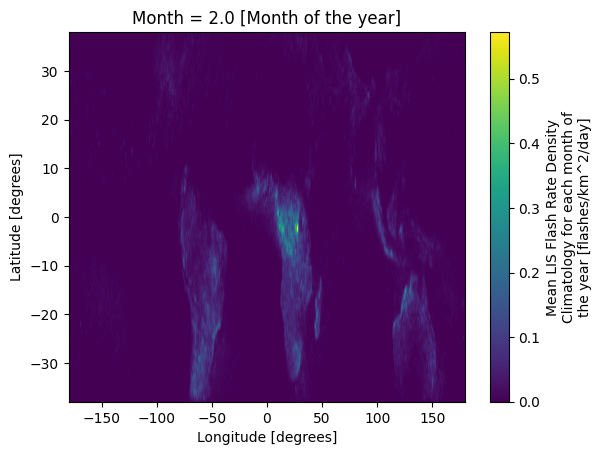

In [116]:
lis.VHRMC_LIS_FRD.isel(Month=1).plot()

In [117]:
lis=lis.rename({"Longitude":"longitude","Latitude":"latitude"})

In [118]:
lis=lis.rename({"Month":"time"})

In [119]:
lis

<xarray.Dataset>
Dimensions:        (longitude: 3600, latitude: 760, time: 12)
Coordinates:
  * longitude      (longitude) float64 -179.9 -179.8 -179.8 ... 179.9 179.9
  * latitude       (latitude) float64 -37.95 -37.85 -37.75 ... 37.75 37.85 37.95
  * time           (time) float64 1.0 2.0 3.0 4.0 5.0 ... 8.0 9.0 10.0 11.0 12.0
Data variables:
    VHRMC_LIS_FRD  (time, latitude, longitude) float32 ...
    VHRMC_LIS_VT   (time, latitude, longitude) timedelta64[ns] ...
Attributes:
    Title:         LIS Very High Resolution Monthly Climatology (VHRMC) (1998...
    ATTENTION:     This dataset has both 49-day and 1.0x1.0 degree boxcar Mov...
    Source:        Tropical Rainfall Measuring Mission
    References:    doi...
    Version:       1.0
    Institutions:  University of Sao Paulo (USP), NOAA NESDIS, NASA MSFC
    history:       R. I. Albrecht, Mon Feb  1 15:08:01 2016

In [122]:
lis.VHRMC_LIS_FRD

<xarray.DataArray 'VHRMC_LIS_FRD' (time: 12, latitude: 760, longitude: 3600)>
[32832000 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float64 -179.9 -179.8 -179.8 ... 179.8 179.9 179.9
  * latitude   (latitude) float64 -37.95 -37.85 -37.75 ... 37.75 37.85 37.95
  * time       (time) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0
Attributes:
    units:      flashes/km^2/day
    long_name:  Mean LIS Flash Rate Density Climatology for each month of the...

In [123]:
import rioxarray as rio
import numpy as np
#set crs --- set cordenadas geograficas
lis.rio.set_crs(shp_junin.crs)
lisCRP=xr_crop(shp_i=shp_junin,netcdf_i=lis)
#shape to grid
lis_grid=xr_shp_to_grid(shp_i = shp_junin, netcdf_array = lis.VHRMC_LIS_FRD.isel(time=0))
#make a mask
lisMASK=xr_mask(grid_mask=lis_grid, netcdf_i=lisCRP)

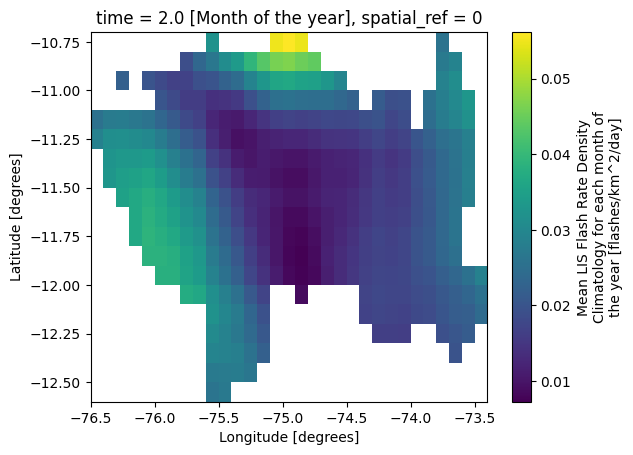

In [124]:
lisMASK.VHRMC_LIS_FRD.isel(time=1).plot()

In [125]:
cape_montlyMASK

<xarray.DataArray 'cape' (time: 12, latitude: 8, longitude: 12)>
array([[[       nan,        nan,        nan, ...,        nan,
         715.2231  ,        nan],
        [105.69358 , 146.0278  , 194.93437 , ...,        nan,
         655.3868  ,        nan],
        [123.25444 , 141.76277 , 143.91989 , ..., 454.17038 ,
         495.87607 , 575.60803 ],
        ...,
        [       nan,        nan, 137.4176  , ..., 226.56764 ,
         209.52109 , 312.68768 ],
        [       nan,        nan,        nan, ..., 138.51886 ,
         131.81548 , 294.34625 ],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
         641.7404  ,        nan],
        [103.52451 , 168.7731  , 172.09717 , ...,        nan,
         609.4535  ,        nan],
        [113.34323 , 153.42766 , 140.724   , ..., 404.4855  ,
         457.8787  , 509.02908 ],
...
        [       nan,        nan, 132.2344  , ..., 380.10336 ,
         318.6442  , 501.83704 ],
        [       nan,        nan,        nan, ..., 266.91846 ,
         252.3657  , 433.03516 ],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
         717.7099  ,        nan],
        [140.10544 , 195.73201 , 223.82542 , ...,        nan,
         755.8907  ,        nan],
        [148.42488 , 181.4279  , 176.69312 , ..., 543.5931  ,
         591.1303  , 626.1353  ],
        ...,
        [       nan,        nan, 145.7385  , ..., 195.74974 ,
         182.33447 , 364.77814 ],
        [       nan,        nan,        nan, ..., 137.10173 ,
         107.52631 , 281.03854 ],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -76.25 -76.0 -75.75 ... -74.0 -73.75 -73.5
  * latitude   (latitude) float32 -10.75 -11.0 -11.25 ... -12.0 -12.25 -12.5
  * time       (time) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    units:      J kg**-1
    long_name:  Convective available potential energy

In [126]:
lisMASK

<xarray.Dataset>
Dimensions:        (time: 12, latitude: 19, longitude: 31)
Coordinates:
  * longitude      (longitude) float64 -76.45 -76.35 -76.25 ... -73.55 -73.45
  * latitude       (latitude) float64 -12.55 -12.45 -12.35 ... -10.85 -10.75
  * time           (time) float64 1.0 2.0 3.0 4.0 5.0 ... 8.0 9.0 10.0 11.0 12.0
    spatial_ref    int64 0
Data variables:
    VHRMC_LIS_FRD  (time, latitude, longitude) float32 nan nan nan ... nan nan
    VHRMC_LIS_VT   (time, latitude, longitude) timedelta64[ns] NaT NaT ... NaT
Attributes:
    Title:         LIS Very High Resolution Monthly Climatology (VHRMC) (1998...
    ATTENTION:     This dataset has both 49-day and 1.0x1.0 degree boxcar Mov...
    Source:        Tropical Rainfall Measuring Mission
    References:    doi...
    Version:       1.0
    Institutions:  University of Sao Paulo (USP), NOAA NESDIS, NASA MSFC
    history:       R. I. Albrecht, Mon Feb  1 15:08:01 2016

In [127]:
#CC se interpola de mayor a menor resolución
lisMASK_interpolated=lisMASK.VHRMC_LIS_FRD.interp_like(cape_montlyMASK,method="nearest")
lisMASK_interpolated=lisMASK_interpolated.to_dataset()

In [128]:
lisMASK_interpolated

<xarray.Dataset>
Dimensions:        (longitude: 12, latitude: 8, time: 12)
Coordinates:
    spatial_ref    int64 0
  * longitude      (longitude) float32 -76.25 -76.0 -75.75 ... -73.75 -73.5
  * latitude       (latitude) float32 -10.75 -11.0 -11.25 ... -12.0 -12.25 -12.5
  * time           (time) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    VHRMC_LIS_FRD  (time, latitude, longitude) float32 nan nan nan ... nan nan

In [131]:

cor_field_field_space1 = xr.apply_ufunc(cor_point_grid2,
                                       lisMASK_interpolated.VHRMC_LIS_FRD,
                                       cape_montlyMASK,
                                       input_core_dims=[["latitude","longitude"], ["latitude","longitude"]],
                                       vectorize=True)
cor_field_field_space1

<xarray.DataArray (time: 12)>
array([-0.02591533,  0.00898123, -0.00729745, -0.07403525,  0.00909278,
        0.82837105,  0.84867226,  0.75125178,  0.74470169,  0.71923499,
        0.73533633,  0.38485499])
Coordinates:
    spatial_ref  int64 0
  * time         (time) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [142]:
cor_field_field_space.time[:]

<xarray.DataArray 'time' (time: 12)>
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])
Coordinates:
  * time     (time) int64 1 2 3 4 5 6 7 8 9 10 11 12

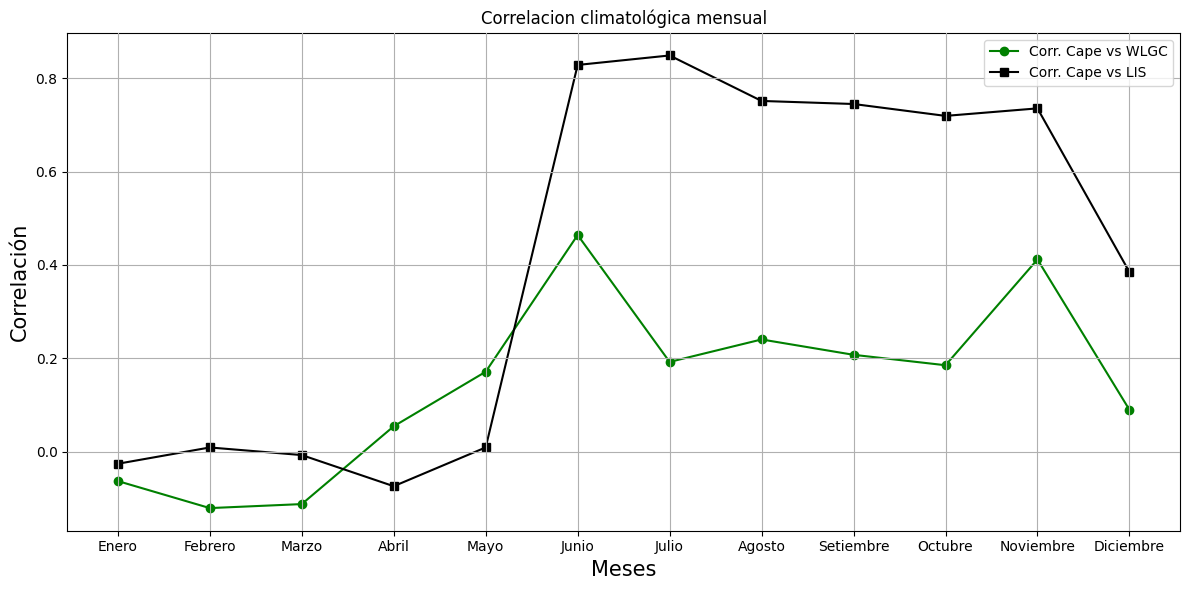

In [148]:
fig, ax=plt.subplots(1,1,figsize=(12,6))
ax.set_axisbelow(False)
mb=cor_field_field_space.plot(color="green", marker="o",label="Corr. Cape vs WLGC")
mb2=cor_field_field_space1.plot(color="black",marker="s",label="Corr. Cape vs LIS")

etiquetas_x = ['Enero',"Febrero", "Marzo",'Abril',"Mayo","Junio","Julio","Agosto","Setiembre","Octubre","Noviembre", 'Diciembre']  # Etiquetas para los nuevos valores

ax.set_xticks(cor_field_field_space.time[:],etiquetas_x)
ax.set_xlabel("Meses",fontsize=15)
ax.set_ylabel("Correlación",fontsize=15)
ax.set_title("Correlacion climatológica mensual")

ax.legend()
ax.grid()
plt.tight_layout()
plt.savefig("correlacion.jpg")
plt.show()